Data fetched from Spotify:
                    SongID                        Name  \
0  5jXrULyYKHjkAMk4TXZFoG              Kaadhal Endral   
1  6veA8KjkbFRJp1NyG1hyxT  Enadhuyire (From "Bheema")   
2  3c1tJAYgROZEdqRfm7Wsny           Yedho Ondru Ennai   
3  5jOi67yXzjpMdl6KFNWSIe              Usure Pogudhey   
4  3gJbCMoDT9rUmPS1GPd6kn                    Kannamma   

                       Artist    Tempo  Danceability  Energy  
0          Yuvan Shankar Raja  129.932         0.638   0.324  
1               Nikkil Mathew  119.996         0.661   0.641  
2          Yuvan Shankar Raja  119.980         0.858   0.447  
3                 A.R. Rahman   92.997         0.674   0.663  
4  Pradeep Kumar,Dhee,Ananthu  124.895         0.585   0.271  


Enter a song name for recommendations:  kanave kanave


Recommendations for 'kanave kanave':
                     SongID                                   Name  \
10  2CZGdpVV9OU1TslQMvovj5                            Kadhaippoma   
12  0o2S5PKRkpTq8dLx8O7W4j   Velicha Poove (From "Ethir Neechal")   
13  5fqsWynhQRpoIVeRfRu4yQ                          Un Vizhigalil   
15  6sPW145Y3LSXd4p1LjBOcS                          Kanave Kanave   
20  6zdikHQs2PBFgGIZBxqOeV           Po Nee Po - The Pain of Love   
22  4Ndcwn2iAt1MdU6lpw24ZQ  Marappadhilai Nenje - Additional Song   
25  6pW1AQhs75Cc5WTgoRQ8vi                       Saaral Mazhaiyaa   
32  5DYfTyqUNBmOnQtljQjYk2                                 Ayyayo   

                 Artist   Tempo  Danceability  Energy       Mood  Cluster  
10           Leon James  89.999         0.576   0.572       Calm        0  
12  Anirudh Ravichander  79.803         0.543   0.701      Angry        0  
13  Anirudh Ravichander  80.217         0.502   0.625        Sad        0  
15  Anirudh Ravichander  95.015     

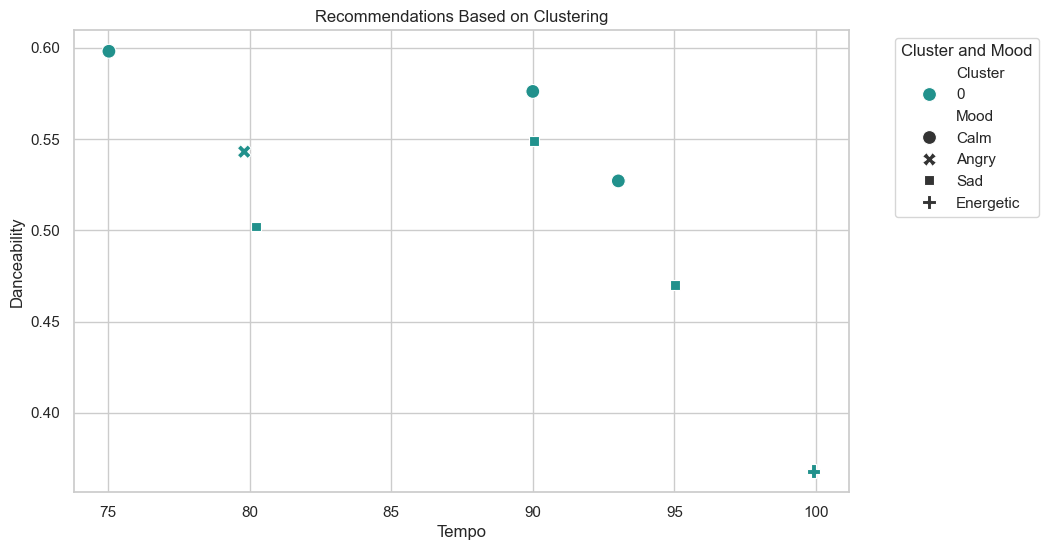

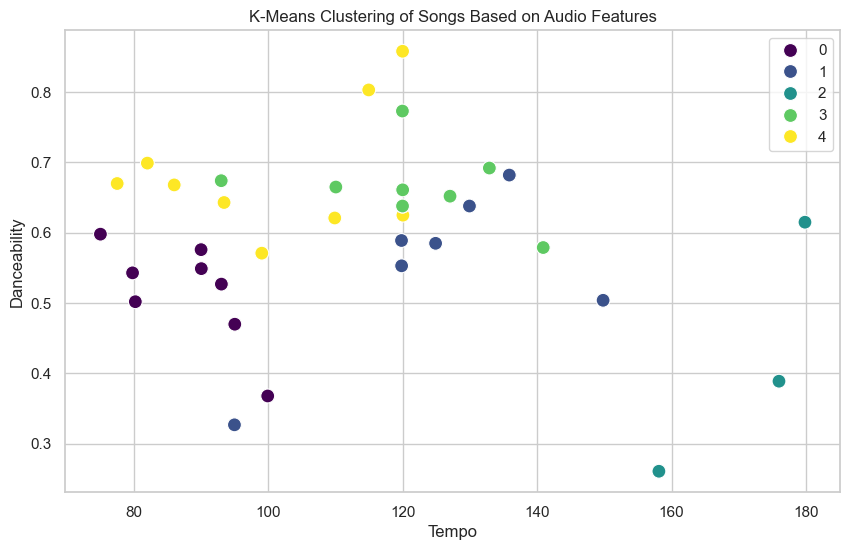

c:\users\karth\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\karth\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\karth\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Classification Report:
               precision    recall  f1-score   support

       Angry       0.31      0.62      0.42         8
        Calm       0.41      0.70      0.52        10
   Energetic       1.00      0.33      0.50         9
       Happy       0.00      0.00      0.00         4
         Sad       0.00      0.00      0.00         5

    accuracy                           0.42        36
   macro avg       0.34      0.33      0.29        36
weighted avg       0.43      0.42      0.36        36



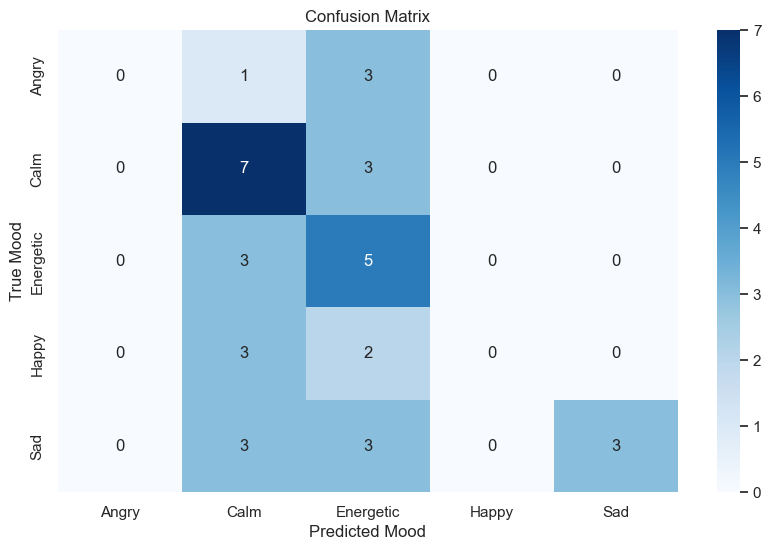

In [1]:
# Import necessary libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Set up Seaborn for visualization aesthetics
sns.set(style="whitegrid")

# Spotify Authentication
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id='10afa25bd536409ab818d5a6199ce3fc', 
    client_secret='ba7d499464494cecb1bcbfc2ac448a9f'
))

# Fetch Songs from a Playlist and Get Audio Features
def get_songs_from_playlist(playlist_id, sp):
    playlist_tracks = sp.playlist_tracks(playlist_id)
    songs = []

    for item in playlist_tracks['items']:
        track = item['track']
        song_id = track['id']
        song_name = track['name']
        artist_name = track['artists'][0]['name']

        audio_features = sp.audio_features(song_id)[0]
        if audio_features:
            songs.append({
                'SongID': song_id,
                'Name': song_name,
                'Artist': artist_name,
                'Tempo': audio_features['tempo'],
                'Danceability': audio_features['danceability'],
                'Energy': audio_features['energy']
            })

    return pd.DataFrame(songs)

# Example playlist ID (replace with your own or a more extensive one)
playlist_id = '4DvBrDfXIFSXaWRCRlZI4l'  # Example: "myplaylist"
df = get_songs_from_playlist(playlist_id, sp)
print("Data fetched from Spotify:\n", df.head())

# Assign Moods
moods = ['Happy', 'Sad', 'Energetic', 'Calm', 'Angry']
np.random.seed(42)
df['Mood'] = np.random.choice(moods, size=len(df))

# Preprocess the Data
X = df[['Tempo', 'Danceability', 'Energy']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Recommend Songs from the Same Cluster
def recommend_songs(song_id, df):
    cluster = df.loc[df['SongID'] == song_id, 'Cluster'].values[0]
    recommended_songs = df[df['Cluster'] == cluster][['SongID', 'Name', 'Artist', 'Tempo', 'Danceability', 'Energy', 'Mood', 'Cluster']]
    return recommended_songs

# Plot Recommendations
def plot_recommendations(recommendations):
    if recommendations.empty:
        print("No recommendations to plot.")
        return

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=recommendations, x='Tempo', y='Danceability', hue='Cluster', style='Mood', s=100, palette='viridis')
    plt.title('Recommendations Based on Clustering')
    plt.xlabel('Tempo')
    plt.ylabel('Danceability')
    plt.legend(title='Cluster and Mood', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Get Recommendations based on song name
def get_song_recommendation(song_name, df):
    song_row = df[df['Name'].str.contains(song_name, case=False, na=False)]
    if not song_row.empty:
        song_id = song_row['SongID'].values[0]
        recommendations = recommend_songs(song_id, df)

        if recommendations.empty:
            print(f"No recommendations found for '{song_name}' in the same cluster.")
            cluster_id = song_row['Cluster'].values[0]
            print(f"Cluster ID for '{song_name}': {cluster_id}")
        else:
            print(f"Recommendations for '{song_name}':\n", recommendations)
            plot_recommendations(recommendations)
    else:
        print(f"Song '{song_name}' not found in the dataset.")

# Call the get_song_recommendation function with user input
song_input = input("Enter a song name for recommendations: ")
get_song_recommendation(song_input, df)

# Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tempo', y='Danceability', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('K-Means Clustering of Songs Based on Audio Features')
plt.xlabel('Tempo')
plt.ylabel('Danceability')
plt.legend()
plt.show()

# Evaluate Clustering Results
def evaluate_clustering(df):
    cluster_to_mood = {}
    for cluster in df['Cluster'].unique():
        mood_samples = df[df['Cluster'] == cluster]['Mood'].dropna().values
        if mood_samples.size > 0:
            cluster_to_mood[cluster] = pd.Series(mood_samples).mode()[0]
    
    df['Predicted_Mood'] = df['Cluster'].map(cluster_to_mood)

    valid_df = df.dropna(subset=['Mood', 'Predicted_Mood'])

    if valid_df.empty:
        print("No valid data for evaluation.")
        return

    y_true = valid_df['Mood']
    y_pred = valid_df['Predicted_Mood']
    
    conf_matrix = confusion_matrix(y_true, y_pred, labels=list(set(y_true) | set(y_pred)))

    class_report = classification_report(y_true, y_pred)
    print("Classification Report:\n", class_report)

    plt.figure(figsize=(10, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Mood')
    plt.ylabel('True Mood')
    plt.show()

# Call the evaluation function
evaluate_clustering(df)
